# Kaggle Connection

In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.1 MB/s eta 0:00:0000:010m
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=ef44a1ef8d01889f09deb74f1851e1529b648f13861e891cfb43a8506120e22f
  Stored in directory: /Users/anurag/Library/Caches/pip/wheels/6a/2b/d0/457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

online-payments-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip /content/online-payments-fraud-detection-dataset.zip

unzip:  cannot find or open /content/online-payments-fraud-detection-dataset.zip, /content/online-payments-fraud-detection-dataset.zip.zip or /content/online-payments-fraud-detection-dataset.zip.ZIP.


#Importing Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Dataset

In [8]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_20174392719_1491204439457_log.csv'

#Getting Basic Information of the Dataset

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.info()

#Dropping Unnecessary Columns

In [ ]:
df.drop(["isFlaggedFraud"], axis=1, inplace=True)

Data Visualisations

##Correlation Plot

In [ ]:
df.corr()

##Heat Map

In [9]:
sns.heatmap(df.corr(), annot=True)

NameError: name 'df' is not defined

#Univariate Analysis

##Histogram

<Axes: xlabel='step', ylabel='Count'>

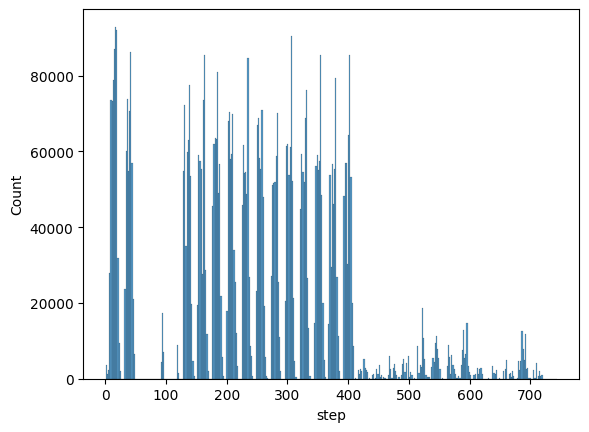

In [16]:
sns.histplot(data=df, x='step')

##Count Plot

<Axes: xlabel='step', ylabel='count'>

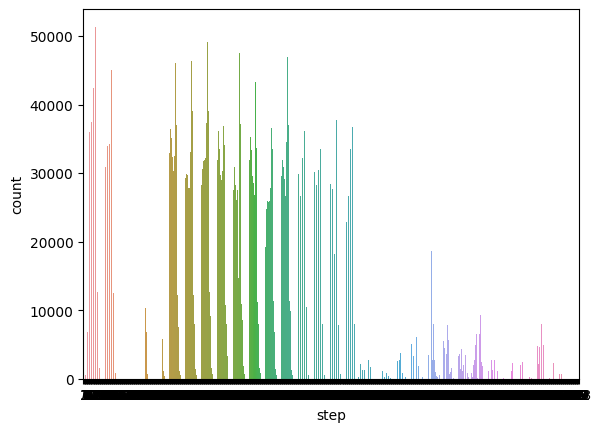

In [17]:
sns.countplot(df, x='step')

##Boxplot

<Axes: xlabel='step'>

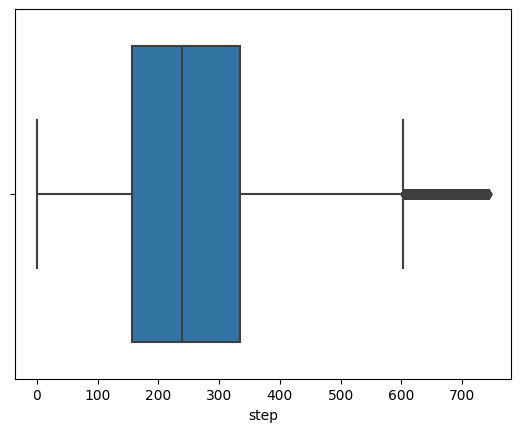

In [18]:
sns.boxplot(df, x='step')

<Axes: xlabel='amount'>

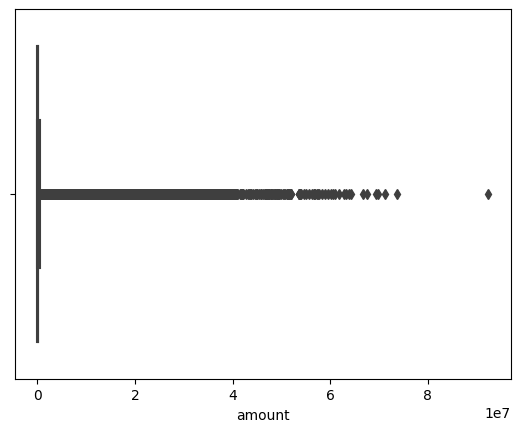

In [19]:
sns.boxplot(df, x='amount')

<Axes: xlabel='oldbalanceDest'>

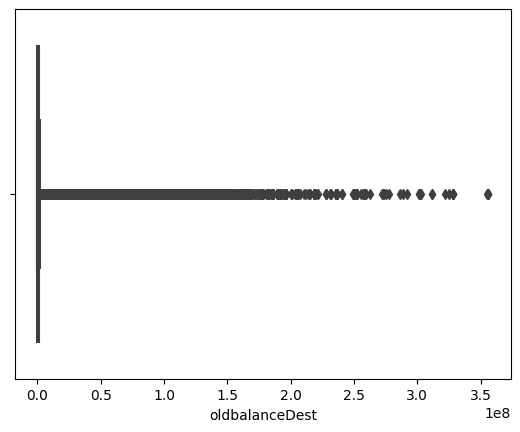

In [20]:
sns.boxplot(df, x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

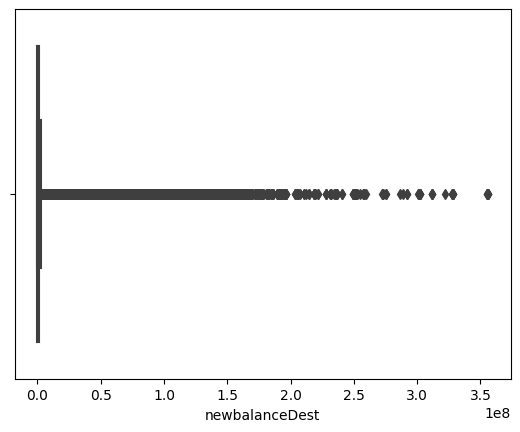

In [21]:
sns.boxplot(df, x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

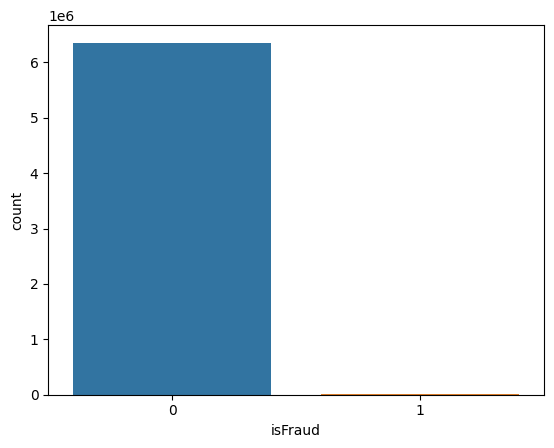

In [22]:
sns.countplot(df, x='isFraud')

##Target Column Analysis

In [23]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [24]:
df.loc[df["isFraud"]==0, 'isFraud'] = "is not Fraud"
df.loc[df["isFraud"]==1, 'isFraud'] = "is Fraud"

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


#Bi-variate Analysis

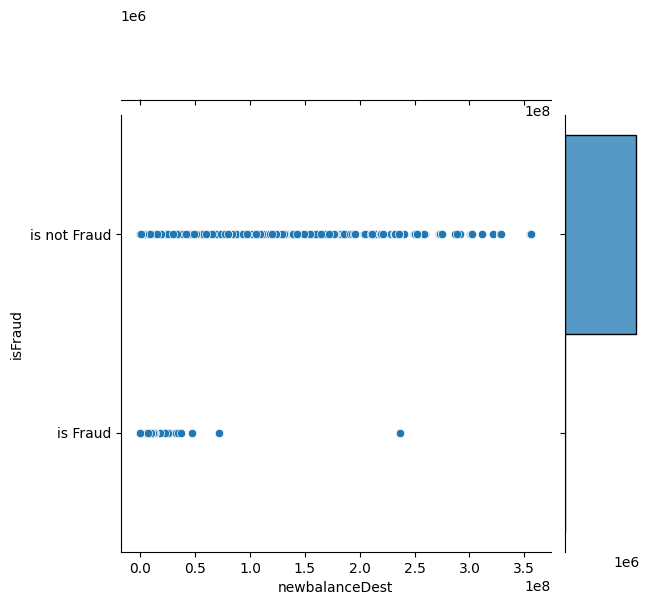

In [26]:
sns.jointplot(df, x="newbalanceDest", y='isFraud')

<Axes: xlabel='type', ylabel='count'>

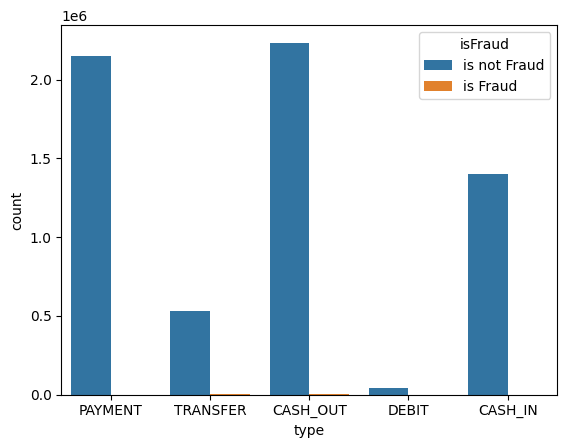

In [27]:
sns.countplot(df, x='type', hue='isFraud')

#Data Preprocessing

In [16]:
df.shape

(6362620, 10)

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

##Checking for Null Values

In [18]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

##Outliers Handling

<Axes: >

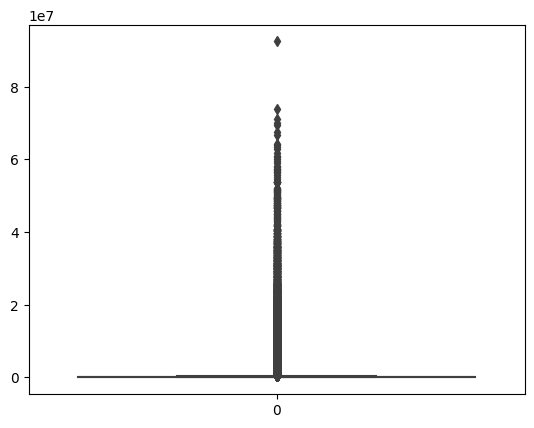

In [19]:
sns.boxplot(df['amount'])

In [20]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=10000000.0, count=3207)
179861.90354913071


In [21]:
q1 = df['amount'].quantile(0.25)
q3 = df['amount'].quantile(0.75)
IQR = q3-q1
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*IQR)
upper_whisker = q3 + (whisker_width*IQR)
df['amount']=np.where(df['amount']>upper_whisker,upper_whisker,np.where(df['amount']<lower_whisker,lower_whisker,df['amount']))

In [22]:
print('Q1 = ', q1)
print('Q3 = ', q3)
print('IQR = ', IQR)
print('Upper Bound = ', upper_whisker)
print('Lower Bound = ', lower_whisker)

Q1 =  13389.57
Q3 =  208721.4775
IQR =  195331.9075
Upper Bound =  501719.33875
Lower Bound =  -279608.29125


In [23]:
df['amount'] = np.log(df['amount'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df.drop(['nameDest', 'nameOrig'], axis=1, inplace=True)

#Label Encoding

In [25]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [26]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [28]:
# '0'-> Cash In, '1'-> Cash Out, '2'-> Debit, '3'-> Payment, '4'-> Transfer
df['type']= label_encoder.fit_transform(df['type'])
df['type'].unique()

array([3, 4, 1, 2, 0])

In [29]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

#X & Y Split and Scaling Columns

In [30]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(x), columns=x.columns)

In [31]:
x_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.778262,0.002855,0.003233,0.000000,0.0
1,0.0,0.75,0.684441,0.000357,0.000391,0.000000,0.0
2,0.0,1.00,0.552912,0.000003,0.000000,0.000000,0.0
3,0.0,0.25,0.552912,0.000003,0.000000,0.000059,0.0
4,0.0,0.75,0.787875,0.000697,0.000603,0.000000,0.0


In [32]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, random_state=50, test_size=0.3)

In [34]:
X_train.shape

(4453822, 7)

In [35]:
X_test.shape

(1908782, 7)

In [36]:
y_train.shape

(4453822,)

In [37]:
y_test.shape

(1908782,)

#Model Building

##Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [110]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
y_test_pred_1 = rfc.predict(X_test)

In [112]:
accuracy_test_1 = accuracy_score(y_test, y_test_pred_1)
accuracy_test_1

0.9996898545774217

In [113]:
pd.crosstab(y_test, y_test_pred_1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1889,552
is not Fraud,40,1906301


##Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [115]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
y_test_pred_2 = dtc.predict(X_test)

In [117]:
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)
accuracy_test_2

0.9996662793341513

In [118]:
pd.crosstab(y_test, y_test_pred_2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,2079,362
is not Fraud,275,1906066


## Extra Trees Classifier

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [120]:
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [121]:
y_test_pred_3 = etc.predict(X_test)

In [122]:
accuracy_test_3 = accuracy_score(y_test, y_test_pred_3)
accuracy_test_3

0.9996767572200492

In [123]:
pd.crosstab(y_test, y_test_pred_3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1849,592
is not Fraud,25,1906316


##Support Vector Machine

In [38]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
y_test_pred_4 = svc.predict(X_test)

In [ ]:
accuracy_test_4 = accuracy_score(y_test, y_test_pred_4)
accuracy_test_4

In [ ]:
pd.crosstab(y_test, y_test_pred_4)

#Saving the Model

In [ ]:
import pickle

In [ ]:
pickle.dump(svc, open('model.pkl', 'wb'))